In [1]:
import cv2
import matplotlib.pyplot as plt

In [8]:
image = cv2.imread("./input.jpg")

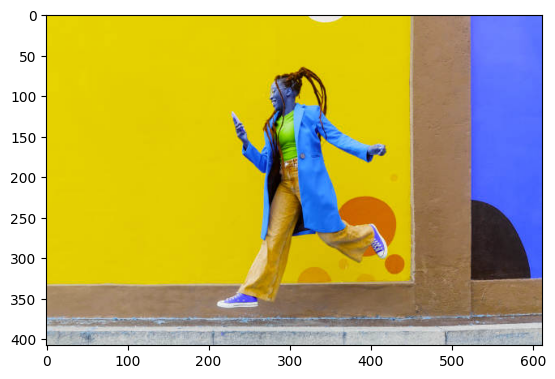

In [9]:
plt.imshow(image)

In [10]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [11]:
image_rgb.shape

(408, 612, 3)

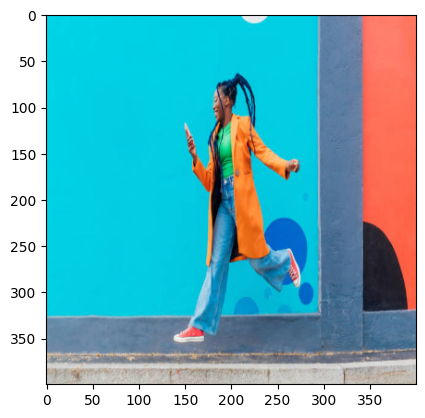

In [12]:
# image resizing

height, width = 400,400

resized_image = cv2.resize(image_rgb, (width, height))

plt.imshow(resized_image)

(204, 306, 3)


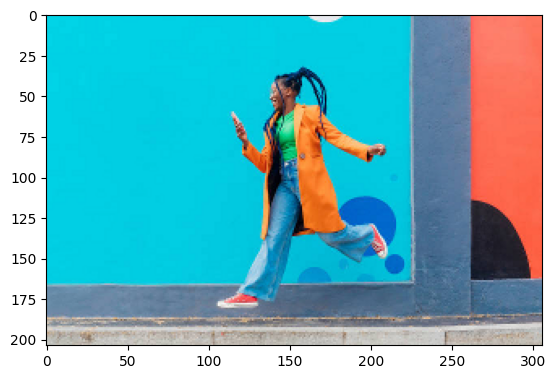

In [13]:
# image scaling

scale_percent = 50

s_width = int(image_rgb.shape[1] * scale_percent / 100)
s_height = int(image_rgb.shape[0] * scale_percent / 100)

scaled_image = cv2.resize(image_rgb, (s_width, s_height), interpolation=cv2.INTER_LANCZOS4)

print(scaled_image.shape)

plt.imshow(scaled_image)

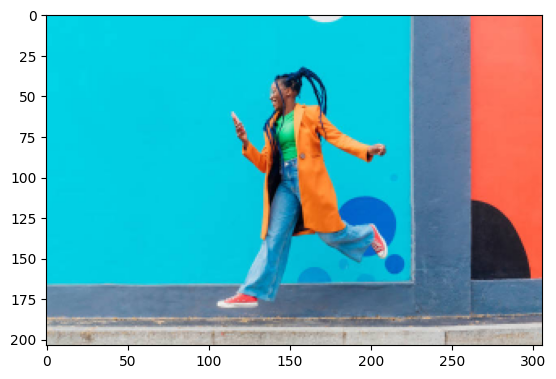

In [14]:

scale_percent = 50

s_width = int(image_rgb.shape[1] * scale_percent / 100)
s_height = int(image_rgb.shape[0] * scale_percent / 100)

scaled_image_INTER_AREA = cv2.resize(image_rgb, (s_width, s_height), interpolation=cv2.INTER_AREA)

plt.imshow(scaled_image_INTER_AREA)

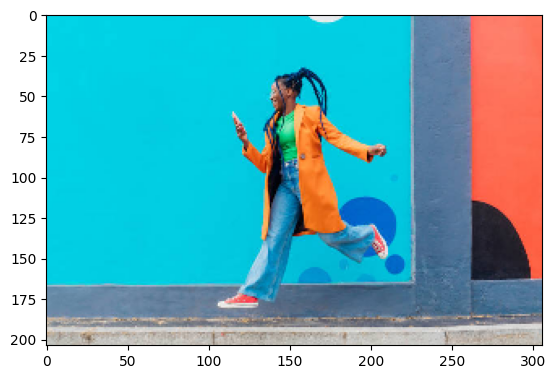

In [15]:

scale_percent = 50

s_width = int(image_rgb.shape[1] * scale_percent / 100)
s_height = int(image_rgb.shape[0] * scale_percent / 100)

scaled_image_INTER_NEAREST = cv2.resize(image_rgb, (s_width, s_height), interpolation=cv2.INTER_NEAREST)

plt.imshow(scaled_image_INTER_NEAREST)